In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 50)

In [2]:
acled_2020 = pd.read_csv('data.csv')

In [3]:
acled_2020.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9835075,180,DRC28679,28679,10 February 2023,2023,1,Strategic developments,Non-violent transfer of territory,M23: March 23 Movement,...,Bukombo,-1.2020,29.1183,1,Radio Okapi,National,"On 10 February 2023, M23 gained control of Buk...",0,1676309784,COD
1,9835076,180,DRC28680,28680,10 February 2023,2023,1,Protests,Excessive force against protesters,Protesters (Democratic Republic of Congo),...,Butembo,0.1420,29.2910,1,7 Sur 7; Politico (DRC); Twitter,New media-National,"On 10 February 2023, the police shot gunshots ...",0,1676309784,COD
2,9835077,180,DRC28681,28681,10 February 2023,2023,2,Strategic developments,Headquarters or base established,ADF: Allied Democratic Forces,...,Mamove,0.8241,29.4412,2,Politico (DRC),National,"Around 10 February 2023 (as reported), ADF est...",0,1676309784,COD
3,9835079,180,DRC28683,28683,10 February 2023,2023,1,Battles,Armed clash,Military Forces of the Democratic Republic of ...,...,Kanyatsi,0.4367,29.3247,1,Mediacongo.net,National,"On 10 February 2023, FARDC clashed with ADF in...",0,1676309784,COD
4,9835080,180,DRC28684,28684,10 February 2023,2023,1,Battles,Armed clash,Military Forces of the Democratic Republic of ...,...,Karenga,-1.4724,29.0655,1,SOS Medias,New media,"On 10 February 2023, FARDC clashed with M23 in...",0,1676309784,COD


In [4]:
acled_2020.region.unique()

array(['Middle Africa', 'Eastern Africa', 'Southern Africa',
       'Northern Africa', 'Western Africa'], dtype=object)

In [5]:
acled_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310565 entries, 0 to 310564
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   data_id           310565 non-null  int64  
 1   iso               310565 non-null  int64  
 2   event_id_cnty     310565 non-null  object 
 3   event_id_no_cnty  310565 non-null  int64  
 4   event_date        310565 non-null  object 
 5   year              310565 non-null  int64  
 6   time_precision    310565 non-null  int64  
 7   event_type        310565 non-null  object 
 8   sub_event_type    310565 non-null  object 
 9   actor1            310565 non-null  object 
 10  assoc_actor_1     81840 non-null   object 
 11  inter1            310565 non-null  int64  
 12  actor2            226154 non-null  object 
 13  assoc_actor_2     60838 non-null   object 
 14  inter2            310565 non-null  int64  
 15  interaction       310565 non-null  int64  
 16  region            31

In [5]:
features = ['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date', 'year', 'time_precision', 'fatalities', 'timestamp','iso3']
acled_sub = acled_2020[features]

In [6]:
## Missing values
acled_sub.isna().sum()

data_id             0
iso                 0
event_id_cnty       0
event_id_no_cnty    0
event_date          0
year                0
time_precision      0
fatalities          0
timestamp           0
iso3                0
dtype: int64

In [7]:
acled_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310565 entries, 0 to 310564
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   data_id           310565 non-null  int64 
 1   iso               310565 non-null  int64 
 2   event_id_cnty     310565 non-null  object
 3   event_id_no_cnty  310565 non-null  int64 
 4   event_date        310565 non-null  object
 5   year              310565 non-null  int64 
 6   time_precision    310565 non-null  int64 
 7   fatalities        310565 non-null  int64 
 8   timestamp         310565 non-null  int64 
 9   iso3              310565 non-null  object
dtypes: int64(7), object(3)
memory usage: 23.7+ MB


In [8]:
print('# of observations:', len(acled_sub))
print('# of unique data_id:', len(acled_sub.data_id.unique())) ## data_id is unique for each observation
print('# of unique iso:', len(acled_sub.iso.unique()))
print(acled_sub.iso.value_counts())
print('# of unique event_id_cnty', len(acled_sub.event_id_cnty.unique())) ## event_id_cnty is unique for each obsevation
print('# of unique event_id_no_cnty', len(acled_sub.event_id_no_cnty.unique()))
print('unique values of time_precision:', acled_sub.time_precision.unique())
# If sources include an actual date of an event, a time precision code of “1”
# is entered. If sources note that an event happened during a specific week or in the weekend
#, “2” is noted in the time precision field and the middle of that week (or of the weekend) is used
#as the reference date. If sources note only that an event took place within a particular
#month, without reference to the particular date, the month mid-point is chosen unless the beginning or end
#of the month is noted (in which case, the first and last date are used, respectively) and “3” is noted as the time precision level


# of observations: 310565
# of unique data_id: 310565
# of unique iso: 57
706    39219
566    29531
180    28074
729    18934
710    18197
       ...  
174       77
226       75
678       25
690       11
654        2
Name: iso, Length: 57, dtype: int64
# of unique event_id_cnty 310565
# of unique event_id_no_cnty 41563
unique values of time_precision: [1 2 3]


In [11]:
acled_sub.time_precision.value_counts()

1    277314
2     25252
3      7999
Name: time_precision, dtype: int64

## Time of Event

In [9]:
def f1(x):
    day, month, year = x.split(' ')
    return f'{month}-{year}'
acled_sub['month-year'] = pd.to_datetime(acled_sub.event_date.map(f1), format = '%B-%Y')
acled_sub['event_date'] = pd.to_datetime(acled_sub.event_date)

C:\Users\zhuye\AppData\Local\Temp\ipykernel_26500\3032994154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_sub['month-year'] = pd.to_datetime(acled_sub.event_date.map(f1), format = '%B-%Y')
C:\Users\zhuye\AppData\Local\Temp\ipykernel_26500\3032994154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_sub['event_date'] = pd.to_datetime(acled_sub.event_date)


In [10]:
acled_sub['#event'] =acled_sub.groupby('month-year')['month-year'].transform('count')

C:\Users\zhuye\AppData\Local\Temp\ipykernel_26500\75714920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_sub['#event'] =acled_sub.groupby('month-year')['month-year'].transform('count')


In [11]:
acled_sub

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,fatalities,timestamp,iso3,month-year,#event
0,9835075,180,DRC28679,28679,2023-02-10,2023,1,0,1676309784,COD,2023-02-01,884
1,9835076,180,DRC28680,28680,2023-02-10,2023,1,0,1676309784,COD,2023-02-01,884
2,9835077,180,DRC28681,28681,2023-02-10,2023,2,0,1676309784,COD,2023-02-01,884
3,9835079,180,DRC28683,28683,2023-02-10,2023,1,0,1676309784,COD,2023-02-01,884
4,9835080,180,DRC28684,28684,2023-02-10,2023,1,0,1676309784,COD,2023-02-01,884
...,...,...,...,...,...,...,...,...,...,...,...,...
310560,9695770,694,SIE2,2,1997-01-01,1997,3,0,1670286851,SLE,1997-01-01,241
310561,9695771,694,SIE3,3,1997-01-01,1997,3,0,1670286851,SLE,1997-01-01,241
310562,9695772,694,SIE6,6,1997-01-01,1997,3,0,1670286851,SLE,1997-01-01,241
310563,9695773,694,SIE7,7,1997-01-01,1997,3,0,1670286851,SLE,1997-01-01,241


<AxesSubplot: xlabel='month-year', ylabel='#event'>

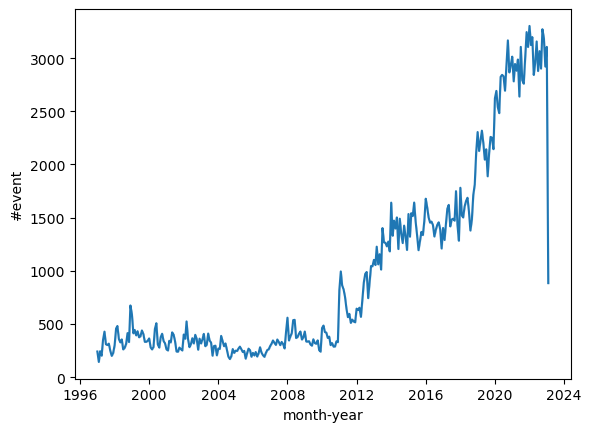

In [12]:
sns.lineplot(data=acled_sub,x = 'month-year', y = '#event')

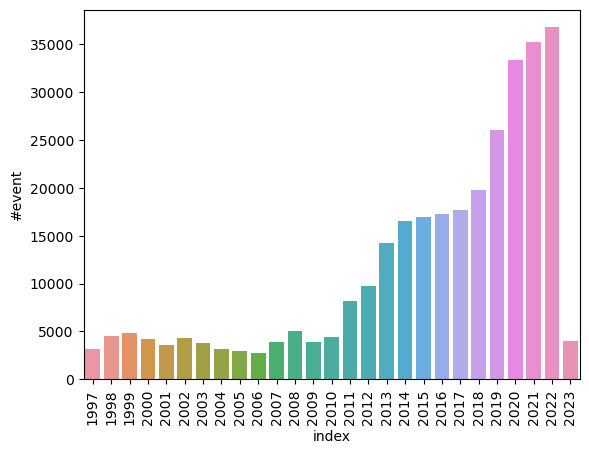

In [13]:
ax = sns.barplot(data=acled_2020.year.value_counts().sort_index().rename('#event').reset_index(),
            x = 'index',
            y = '#event')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Fatality of event

In [14]:
print(sorted(acled_sub.fatalities.unique()))
acled_sub.fatalities.value_counts().sort_index(ascending=True)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 172, 173, 174, 175, 176, 180, 181, 183, 185, 186, 187, 188, 189, 190, 192, 194, 195, 197, 200, 201, 202, 205, 207, 208, 209, 210, 211, 212, 213, 215, 216, 220, 224, 225, 226, 227, 230, 231, 234, 236, 237, 240, 244, 247, 248, 250, 251, 257, 259, 260, 264, 266, 267, 270, 272, 275,

0       211965
1        38924
2        15530
3        10137
4         5576
         ...  
963          1
1000       118
1037         1
1172         1
1350         4
Name: fatalities, Length: 273, dtype: int64

In [15]:
acled_sub.shape[0]

310565

In [16]:
acled_sub2 = acled_sub[acled_sub.fatalities>0]

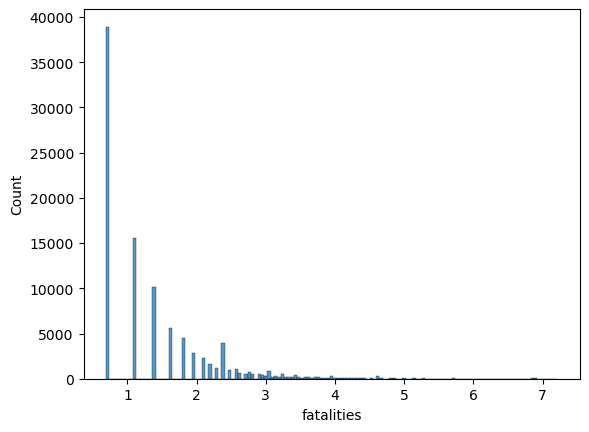

In [17]:
sns.histplot(data = np.log(acled_sub2.fatalities+1));

In [25]:
acled_sub['tranformed_fatality'] = np.log(acled_sub.fatalities+1)

C:\Users\zhuye\AppData\Local\Temp\ipykernel_26500\746261793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_sub['tranformed_fatality'] = np.log(acled_sub.fatalities+1)


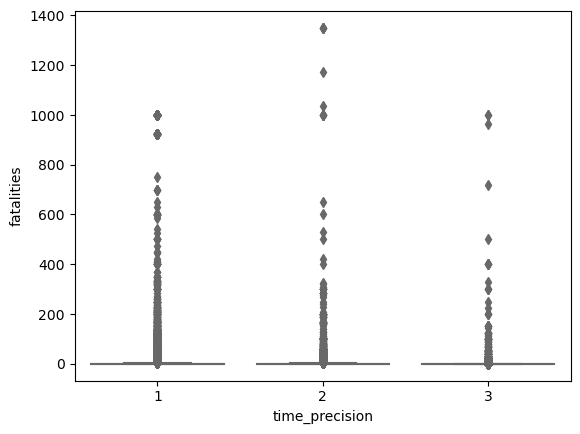

In [18]:
ax = sns.boxplot(x='time_precision', y='fatalities', data=acled_sub, color='#99c2a2')
plt.show();

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [68]:
model = ols('fatalities ~ C(time_precision)', data=acled_sub).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(time_precision),9.712203e+03,2.0,6.301745,0.001833
Residual,2.393179e+08,310562.0,NaN,NaN


In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fatalities   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.302
Date:                Tue, 21 Feb 2023   Prob (F-statistic):            0.00183
Time:                        13:27:42   Log-Likelihood:            -1.4729e+06
No. Observations:              310565   AIC:                         2.946e+06
Df Residuals:                  310562   BIC:                         2.946e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.7166      0.053     51.534      0.000       2.613       2.820
C(time_precision)[T.2]     0.6465      0.182      3.543      0.000       0.289       1.004
C(time_precision)[T.3]     0.1248      0.315      0.396      0.692      -0.492       0.742
==============================================================================
Omnibus:                   805839.022   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      14101323312.074
Skew:                          30.402   Prob(JB):                         0.00
Kurtosis:                    1045.129   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
acled_sub

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,fatalities,timestamp,iso3,month-year,#event,tranformed_fatality
0,9835075,180,DRC28679,28679,2023-02-10,2023,1,0,1676309784,COD,2023-02-01,884,0.000000
1,9835076,180,DRC28680,28680,2023-02-10,2023,1,0,1676309784,COD,2023-02-01,884,0.000000
2,9835077,180,DRC28681,28681,2023-02-10,2023,2,0,1676309784,COD,2023-02-01,884,0.000000
3,9835079,180,DRC28683,28683,2023-02-10,2023,1,0,1676309784,COD,2023-02-01,884,0.000000
4,9835080,180,DRC28684,28684,2023-02-10,2023,1,0,1676309784,COD,2023-02-01,884,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310560,9695770,694,SIE2,2,1997-01-01,1997,3,0,1670286851,SLE,1997-01-01,241,0.000000
310561,9695771,694,SIE3,3,1997-01-01,1997,3,0,1670286851,SLE,1997-01-01,241,0.000000
310562,9695772,694,SIE6,6,1997-01-01,1997,3,0,1670286851,SLE,1997-01-01,241,0.000000
310563,9695773,694,SIE7,7,1997-01-01,1997,3,0,1670286851,SLE,1997-01-01,241,0.000000


In [42]:
selectecd_features = ['data_id','event_date', '#event', 'tranformed_fatality']

data_time = acled_sub[selectecd_features]
data_time['days_from_19970101'] = (data_time['event_date'] - pd.to_datetime('1997-01-01')).dt.days

C:\Users\zhuye\AppData\Local\Temp\ipykernel_26500\3313829096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_time['days_from_19970101'] = (data_time['event_date'] - pd.to_datetime('1997-01-01')).dt.days


In [44]:
data_time['days_from_19970101']

0         9536
1         9536
2         9536
3         9536
4         9536
          ... 
310560       0
310561       0
310562       0
310563       0
310564       0
Name: days_from_19970101, Length: 310565, dtype: int64

In [46]:
data_time.columns

0         884
1         884
2         884
3         884
4         884
         ... 
310560    241
310561    241
310562    241
310563    241
310564    241
Name: #event, Length: 310565, dtype: int64

In [36]:
data_time.to_csv('time.csv')

In [49]:
data_time =data_time.rename(columns={'#event':'#event_within_month'})

In [50]:
time_data = data_time[['data_id','#event_within_month','tranformed_fatality', 'days_from_19970101']]

In [53]:
time_data.to_csv('time&faltatliy.csv')